In [1]:
!pip install assemblyai

   ---------------------------------------- 0.0/72.7 kB ? eta -:--:--
   ---------------------- ----------------- 41.0/72.7 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 72.7/72.7 kB 1.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# assemblyai api 
https://www.assemblyai.com/

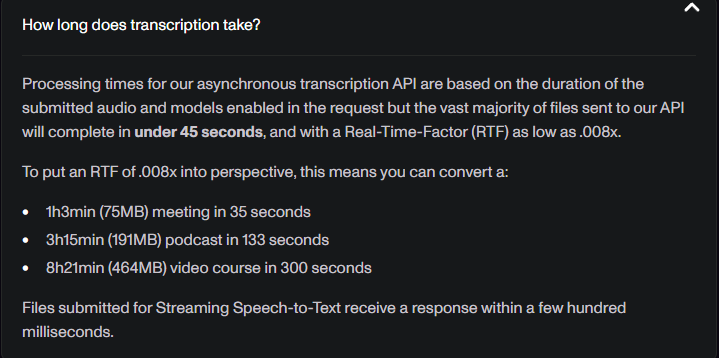


## 1. Transcribe audio file

demo data https://www.youtube.com/watch?v=splkLcpBws8

In [4]:
import assemblyai as aai
from dotenv import load_dotenv
import os

# 加載 .env 文件中的環境變數
load_dotenv()

# 從環境變數中讀取 API 金鑰
api_key = os.getenv('ASSEMBLYAI_API_KEY')

aai.settings.api_key = api_key
transcriber = aai.Transcriber()

transcript = transcriber.transcribe(r".\elon_learning_methos_audio.mp3")
# transcript = transcriber.transcribe("./my-local-audio-file.wav")

print(transcript.text)

You don't need college to learn stuff, okay? Everything is available basically for free. You can learn anything you want for free. It is not a question of learning. There is a value that colleges have, which is like, you know, seeing whether somebody's, can somebody work hard at something, including a bunch of sort of annoying homework assignments, and still do their homework assignments and kind of soldier through and get it done, you know, that's like the main value of college. And then also, you know, if you probably want to hang around with a bunch of people your own age for a while instead of going right into the workforce. So I think colleges are basically for fun and to prove you can do your chores, but they're not for learning. But there is a requirement of evidence of exceptional ability. Like, you just can't. If you're trying to do something exceptional, you must have evidence of exceptional ability. I don't consider going to college evidence of exceptional ability. In fact, 

## 2. Identify speakers in your audio

demo data 
https://www.youtube.com/shorts/GD9FVjTt4UA

In [20]:
import assemblyai as aai
from dotenv import load_dotenv
import os

# 加載 .env 文件中的環境變數
load_dotenv()

# Replace with your API key
aai.settings.api_key = api_key

# URL of the file to transcribe
FILE_URL = r".\Elon_Musk_interview_audio.wav"

# You can also transcribe a local file by passing in a file path
# FILE_URL = './path/to/file.mp3'

config = aai.TranscriptionConfig(speaker_labels=True)

transcriber = aai.Transcriber()
transcript = transcriber.transcribe(
  FILE_URL,
  config=config
)

for utterance in transcript.utterances:
  print(f"Speaker {utterance.speaker}: {utterance.text}")



Speaker A: Elon Musk's favorite interview question is really simple, but it's also the best way to find out if someone is telling the truth or not. The problem is that anyone can say anything in an interview and claim that they're the best at what they do. But it can be hard, if not impossible, to know whether they're telling the truth or not. Well, thankfully, Musk has a solution to this problem, and it goes like this.
Speaker B: My interview question is always the same. Tell me about some of the most difficult problems you worked on and how you solved them. That question, I think, is very important because the people that really solved the problem, they know exactly how they solved it. They know the little details. And the people that pretended to solve the problem, they can maybe go one level, and then they get stuck.


## Identifying highlights in your audio

In [19]:
# Start by making sure the `assemblyai` package is installed.
# If not, you can install it by running the following command:
# pip install -U assemblyai
#
# Note: Some macOS users may need to use `pip3` instead of `pip`.

import assemblyai as aai

# Replace with your API key
aai.settings.api_key = api_key

# URL of the file to transcribe
FILE_URL = "https://github.com/AssemblyAI-Community/audio-examples/raw/main/20230607_me_canadian_wildfires.mp3"

# You can also transcribe a local file by passing in a file path
# FILE_URL = './path/to/file.mp3'

config = aai.TranscriptionConfig(auto_highlights=True)

transcriber = aai.Transcriber()
transcript = transcriber.transcribe(
  FILE_URL,
  config=config
)

sorted_highlights = sorted(transcript.auto_highlights.results, key=lambda x: x.rank, reverse=True)


for result in sorted_highlights:
  print(f"Highlight: {result.text}, Count: {result.count}, Rank: {result.rank}")



Highlight: air quality alerts, Count: 1, Rank: 0.08
Highlight: wide ranging air quality consequences, Count: 1, Rank: 0.08
Highlight: more wildfires, Count: 1, Rank: 0.07
Highlight: air pollution, Count: 1, Rank: 0.07
Highlight: high levels, Count: 2, Rank: 0.06
Highlight: existing health conditions, Count: 1, Rank: 0.06
Highlight: New York City, Count: 1, Rank: 0.06
Highlight: respiratory conditions, Count: 1, Rank: 0.05
Highlight: New York, Count: 3, Rank: 0.05
Highlight: climate change, Count: 3, Rank: 0.05
Highlight: heart conditions, Count: 1, Rank: 0.05
Highlight: air quality warnings, Count: 1, Rank: 0.05
Highlight: Smoke, Count: 6, Rank: 0.05
Highlight: Johns Hopkins University, Count: 2, Rank: 0.05
Highlight: health problems, Count: 1, Rank: 0.05
